In [2]:
import numpy as np
import numpy.random as ra
import matplotlib.pyplot as plt

In [7]:
# Ito Integral

def BrownianMotion(stepsize=0.001, time=1):
    return np.concatenate(([0], np.cumsum(ra.normal(scale=np.sqrt(stepsize), size=int(time/stepsize)))))

def ItoIntegral(f, B, stepsize=0.001):
    increments = [0] + [f(i * stepsize, B[i]) * (B[i+1] - B[i]) for i in range(len(B)-1)]
    return np.cumsum(increments)

def Integral(f, B, stepsize=0.001):
    increments = [0] + [f(i * stepsize, B[i]) * stepsize for i in range(len(B)-1)]
    return np.cumsum(increments)

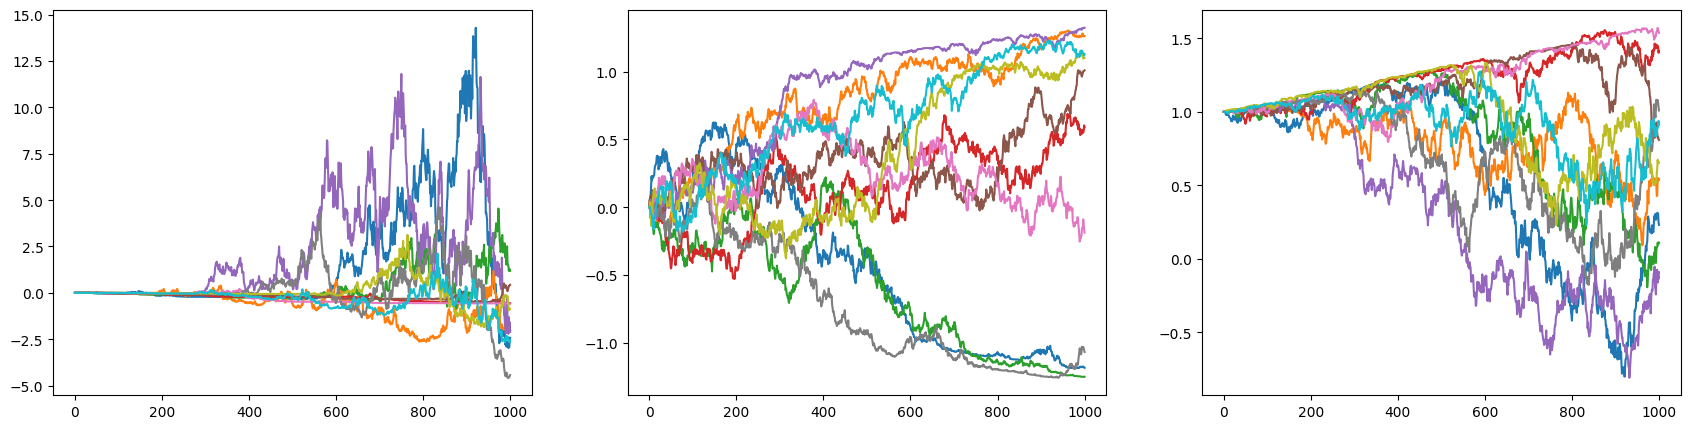

In [4]:
# Ito Integrals

plt.figure(figsize=(21,5))

for i in range(10):
    ra.seed(i)

    B = BrownianMotion(stepsize=0.001)

    plt.subplot(1,3,1)
    plt.plot(ItoIntegral(lambda t, x : 4 * x**3, B))

    plt.subplot(1,3,2)
    plt.plot(ItoIntegral(lambda t, x : np.cos(x), B))

    plt.subplot(1,3,3)
    plt.plot(1 - ItoIntegral(lambda t, x : np.exp(t/2) * np.sin(x), B))

plt.show()

In [5]:
# Ornstein-Uhlenbeck and Brownian Bridge via Ito Integral

def OrnsteinUhlenbeck(B, stepsize=0.001):
    integral = ItoIntegral(lambda t, x : np.exp(t), B, stepsize=stepsize)
    multiplier = np.array([np.exp(- i * stepsize) for i in range(len(B))])
    startingpoint = ra.normal(scale=np.sqrt(1/2))
    return multiplier * (startingpoint + integral)

def BrownianBridge(B, stepsize=0.001):
    integral = ItoIntegral(lambda t, x : 1/(1-t), B, stepsize=stepsize)
    multiplier = np.array([(1 - i * stepsize) for i in range(len(B))])
    return multiplier * integral

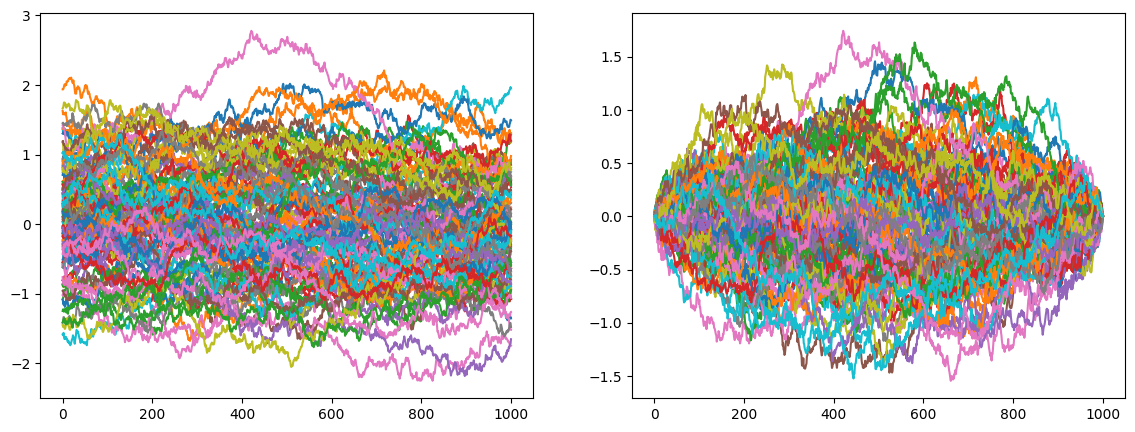

In [6]:
# Plots of O-U and B-B

plt.figure(figsize=(14,5))

for _ in range(100):
    B = BrownianMotion()

    plt.subplot(1,2,1)
    plt.plot(OrnsteinUhlenbeck(B))
    
    plt.subplot(1,2,2)
    plt.plot(BrownianBridge(B))

plt.show()

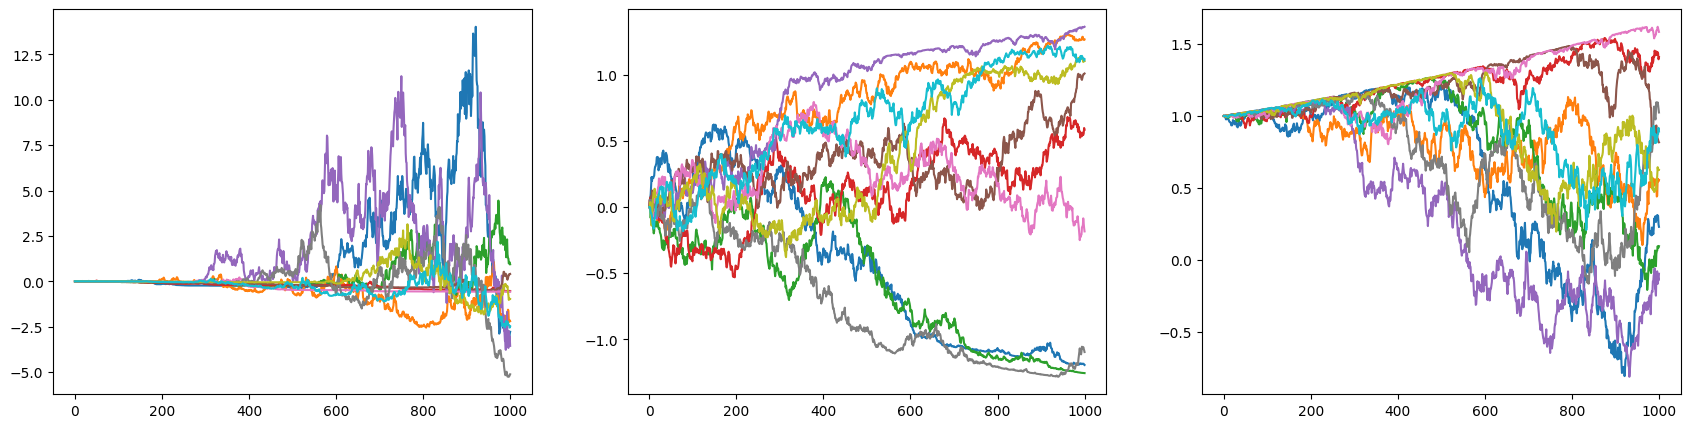

In [16]:
# Ito's Formula

plt.figure(figsize = (21,5))

for i in range(10):
    ra.seed(i)
    B = BrownianMotion()

    plt.subplot(1,3,1)
    plt.plot(B**4 - 6 * Integral(lambda t, x : x**2, B))

    plt.subplot(1,3,2)
    plt.plot(np.sin(B) + 0.5 * Integral(lambda t, x : np.sin(x), B))

    plt.subplot(1,3,3)
    plt.plot(np.exp([i * 0.001 * 0.5 for i in range(len(B))]) * np.cos(B))

plt.show()

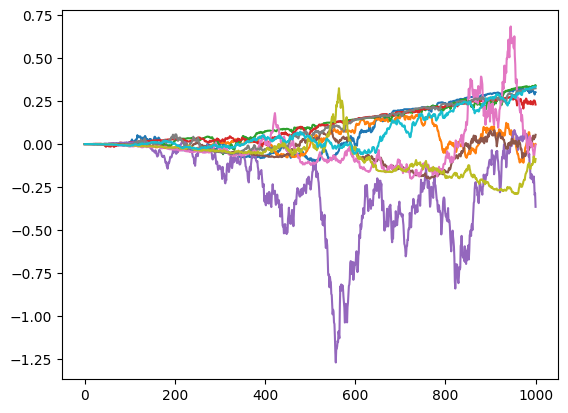

In [25]:
# Path-Dependent Integral

for _ in range(10):
    B = BrownianMotion()
    X = ItoIntegral(lambda t, x : x, B)
    increments = [0] + [X[i] * (B[i+1] - B[i]) for i in range(len(B)-1)]
    I = np.cumsum(increments)
    plt.plot(I)

plt.show()

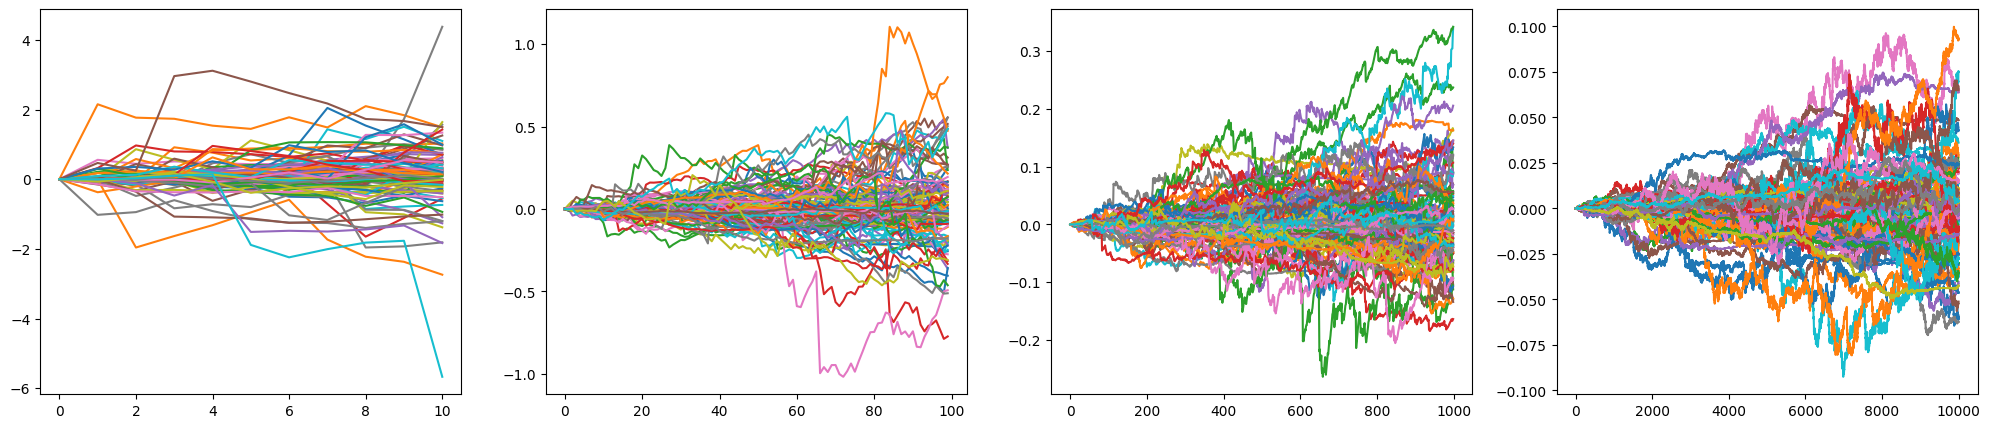

Averages of |I_1 - J_1|: [0.63683818 0.18608628 0.06236811 0.01857233]


In [36]:
# Convergence of Ito's formula

plt.figure(figsize=(25,5))

diff = np.zeros(shape=(4, 100))

for j in range(100):
    for i in range(1,5):
        B = BrownianMotion(stepsize= 0.1**i)

        I = B**3
        J = 3 * (ItoIntegral(lambda t, x : x**2, B, stepsize=0.1**i) + Integral(lambda t, x : x, B, stepsize=0.1**i))

        plt.subplot(1,4,i)
        plt.plot(I - J)

        diff[i-1,j] = np.abs((I-J)[-1])

plt.show()

print(f'Averages of |I_1 - J_1|: {np.average(diff, axis=1)}')

In [42]:
# Gambler's Ruin with Drift

count = 0

for _ in range(10000):
    s = 0.0001
    B = BrownianMotion(stepsize=s, time=10)
    X = B + np.array([i * s for i in range(len(B))])

    if np.min(X) <= -1:
        count += 1

print(count / 10000)
print(np.exp(-2))

0.1369
0.1353352832366127


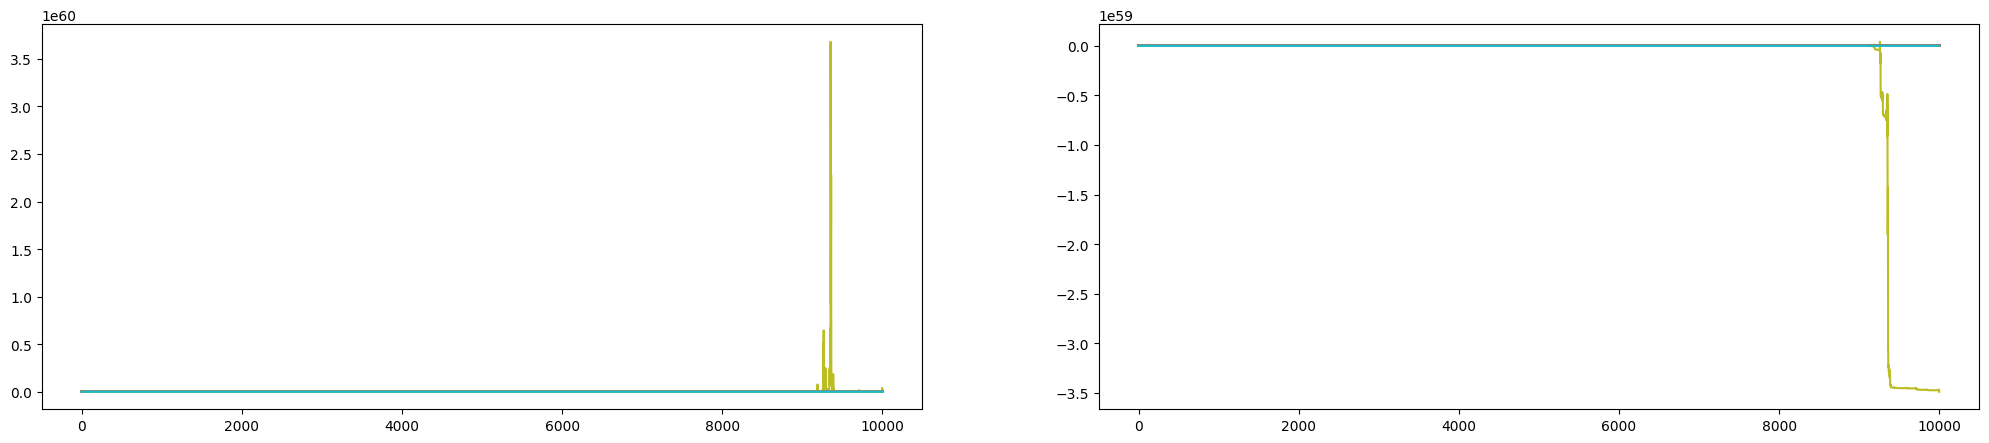

In [48]:
# Integral of a process not in L2

plt.figure(figsize=(25,5))

for _ in range(100):
    B = BrownianMotion(time=10)
    Z = np.exp(B**2)

    plt.subplot(1,2,1)
    plt.plot(Z)

    plt.subplot(1,2,2)
    plt.plot(ItoIntegral(lambda t, x : np.exp(x**2), B))

plt.show()

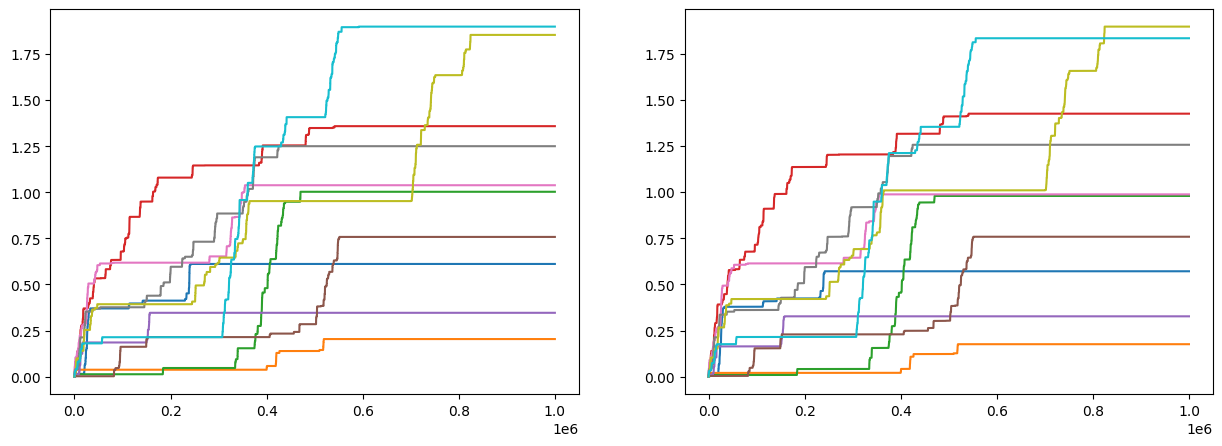

In [51]:
# Tanaka's Formula

plt.figure(figsize=(15,5))

epsilon = 0.001

for _ in range(10):
    B = BrownianMotion(stepsize=1/1000000)

    plt.subplot(1,2,1)
    plt.plot(np.abs(B) - ItoIntegral(lambda t, x : 1 if x >= 0 else -1, B))

    plt.subplot(1,2,2)
    plt.plot(np.cumsum([1 if np.abs(b) < epsilon else 0 for b in B]) / (2 * epsilon * 1000000))

plt.show()